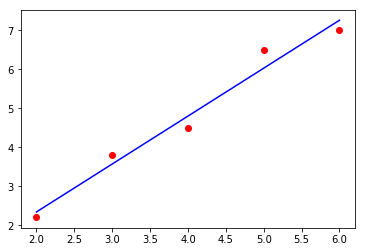

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data_x = np.array([2,3,4,5,6]).reshape(-1,1)
data_y = np.array([2.2,3.8,4.5,6.5,7.0]).reshape(-1,1)

linear = LinearRegression()
linear.fit(data_x,data_y)

plt.scatter(data_x,data_y,c='r')
plt.plot(data_x,linear.predict(data_x),c='b')
plt.show()


In [5]:
print(u'系数',linear.coef_)
print(u'截距',linear.intercept_)

系数 [[1.23]]
截距 [-0.12]


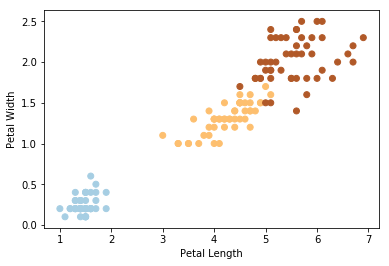

In [9]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:4]
y = iris.target

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

print('训练集准确率：%.2f%%'%(clf.score(X_train,y_train)*100))
print('测试集准确率：%.2f%%'%(clf.score(X_test,y_test)*100))

训练集准确率：99.17%
测试集准确率：100.00%


In [15]:
def plt_boundary(model,axis):
    x0,x1 = np.meshgrid(
         np.linspace(axis[0]-0.2, axis[1]+0.2, int((axis[1]-axis[0])*100)),
         np.linspace(axis[2]-0.2, axis[3]+0.2, int((axis[3]-axis[2])*100))
    )
    
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

C:\Users\7302\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


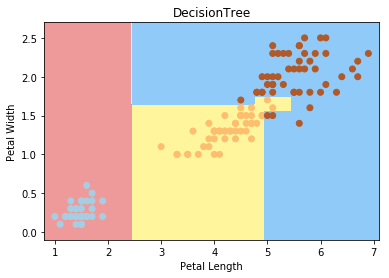

In [16]:
min_1,max_1 = X[:,0].min(), X[:,0].max()
min_2,max_2 = X[:,1].min(), X[:,1].max()

plt_boundary(clf, axis=[min_1, max_1, min_2, max_2])
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('DecisionTree')
plt.show()

In [18]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [19]:
boston = datasets.load_boston()
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [21]:
X_train

array([[ 1.29133866, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.3338103 , -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40072291,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40294118,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85524904, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.37881118, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [27]:
#线性回归的效果
LR = LinearRegression()
LR.fit(X_train,y_train)
print('线性回归训练集准确率：%.2f%%'%(LR.score(X_train,y_train)*100))
print('线性回归测试集准确率：%.2f%%'%(LR.score(X_test,y_test)*100))

#决策树回归的效果
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)
print('决策树回归训练集准确率：%.2f%%'%(DT.score(X_train,y_train)*100))
print('决策树回归测试集准确率：%.2f%%'%(DT.score(X_test,y_test)*100))

#KNN回归的效果
from sklearn.neighbors import KNeighborsRegressor
k = 5
KNN = KNeighborsRegressor(k)
KNN.fit(X_train, y_train)
print('KNN回归训练集准确率：%.2f%%'%(KNN.score(X_train,y_train)*100))
print('KNN回归测试集准确率：%.2f%%'%(KNN.score(X_test,y_test)*100))

线性回归训练集准确率：75.09%
线性回归测试集准确率：62.60%
决策树回归训练集准确率：100.00%
决策树回归测试集准确率：57.19%
KNN回归训练集准确率：84.97%
KNN回归测试集准确率：70.78%


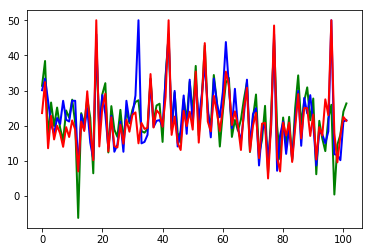

In [28]:
y_lr_pred = LR.predict(X_test)
y_dt_pred = DT.predict(X_test)
plt.plot(y_lr_pred,c='g',linewidth=2)
plt.plot(y_dt_pred,c='b',linewidth=2)
plt.plot(y_test,c='r',linewidth=2)
plt.show()